# ORIE 3120 Final Project 

## **US Traffic Accidents (2016-2023)**

### **Authors**: *Melissa Eckert, Avery Hastings, Judith Jatto, & Nithya Mani*

### Data Introduction & Description

Link to data on Kaggle: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

Link to data description: https://smoosavi.org/datasets/us_accidents

### Project Goals & Questions

### Exploratory Data Analysis

Load Packages & Dataset

In [54]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Data/US_Accidents_March23.csv")

In [41]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [43]:
#Look at null values 

df.isnull().sum()

#a lot of values missing for 'end_lat' and 'end_lng', but could still make a map based on start coordinates

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

#### Analysis of Time

In [55]:
#Looking at number of accidents throughout the day 
time_df = df.copy()
time_df['Start_Time'] = pd.to_datetime(df['Start_Time'], format = 'mixed')
time_df['End_Time'] = pd.to_datetime(df['End_Time'], format = 'mixed')
time_df['duration_min'] = (time_df['End_Time'] - time_df['Start_Time']).dt.total_seconds() / 60
time_df['day_of_week'] = time_df['Start_Time'].dt.day_name()
hour_order = ['12 AM', '01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM', '07 AM', 
              '08 AM', '09 AM', '10 AM', '11 AM', '12 PM', '01 PM', '02 PM', '03 PM', 
              '04 PM', '05 PM', '06 PM', '07 PM', '08 PM', '09 PM', '10 PM', '11 PM']
time_df['Hour'] = time_df['Start_Time'].dt.hour
time_df['Hour'] = pd.to_datetime(time_df['Hour'], format='%H').dt.strftime('%I %p')
time_df['Hour'] = pd.Categorical(time_df['Hour'], categories=hour_order, ordered=True)

accidents_per_hour = time_df['Hour'].value_counts().sort_index()
accidents_per_day = time_df['day_of_week'].value_counts().sort_index()



In [58]:
time_df.describe()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),duration_min
count,7.728394e+06,7728394,7728394,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06,7.728394e+06
mean,2.212384e+00,2020-06-04 04:23:22.765653760,2020-06-04 11:47:48.023095040,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03,4.444210e+02
min,1.000000e+00,2016-01-14 20:18:33,2016-02-08 06:37:08,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.216667e+00
25%,2.000000e+00,2018-11-23 04:01:12.249999872,2018-11-23 05:45:20.500000,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00,3.150000e+01
50%,2.000000e+00,2020-11-11 08:40:22,2020-11-11 15:56:29,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00,7.483333e+01
75%,2.000000e+00,2022-01-20 07:30:08.500000,2022-01-20 17:44:40,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00,1.251500e+02
max,4.000000e+00,2023-03-31 23:30:00,2023-03-31 23:59:00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01,2.812939e+06
std,4.875313e-01,NaN,NaN,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01,1.351229e+04


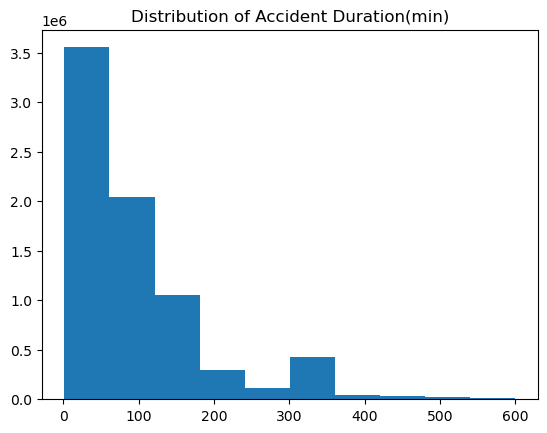

In [61]:
#why are there accidents lasting over 5 years?
time_df[time_df['duration_min'] == 2812939]

#filter df to look only at accidents lasting less than 10 hrs
time_df = time_df[time_df['duration_min'] < 600]
plt.hist(time_df['duration_min'])
plt.title("Distribution of Accident Duration(min)")
plt.show()

Plot number of accidents by hours of the day 

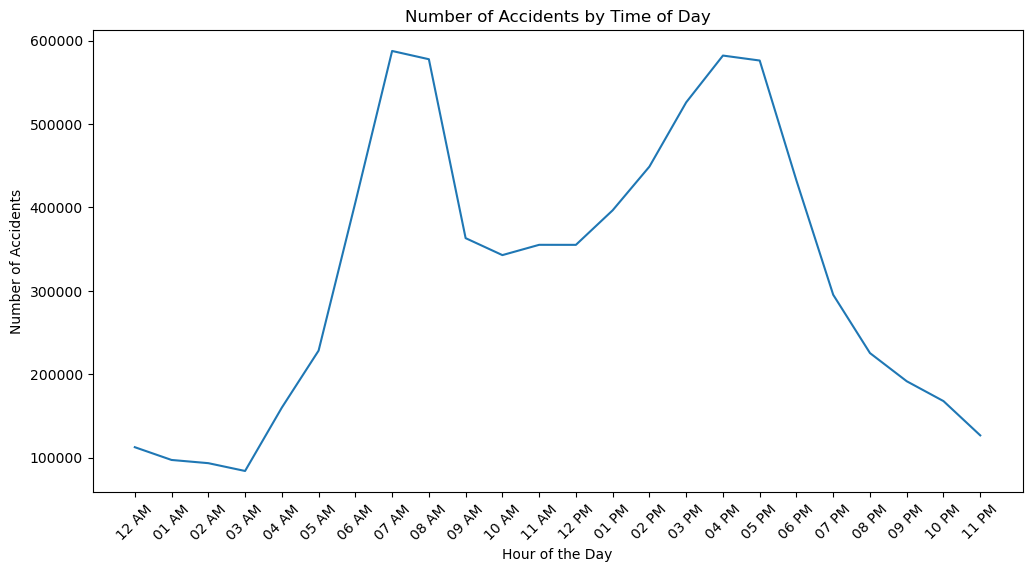

In [47]:

plt.figure(figsize = (12,6))
plt.plot(accidents_per_hour.index, accidents_per_hour.values)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Time of Day")
plt.xticks(rotation = 45)

plt.savefig("accidents_by_hour", dpi = 300)

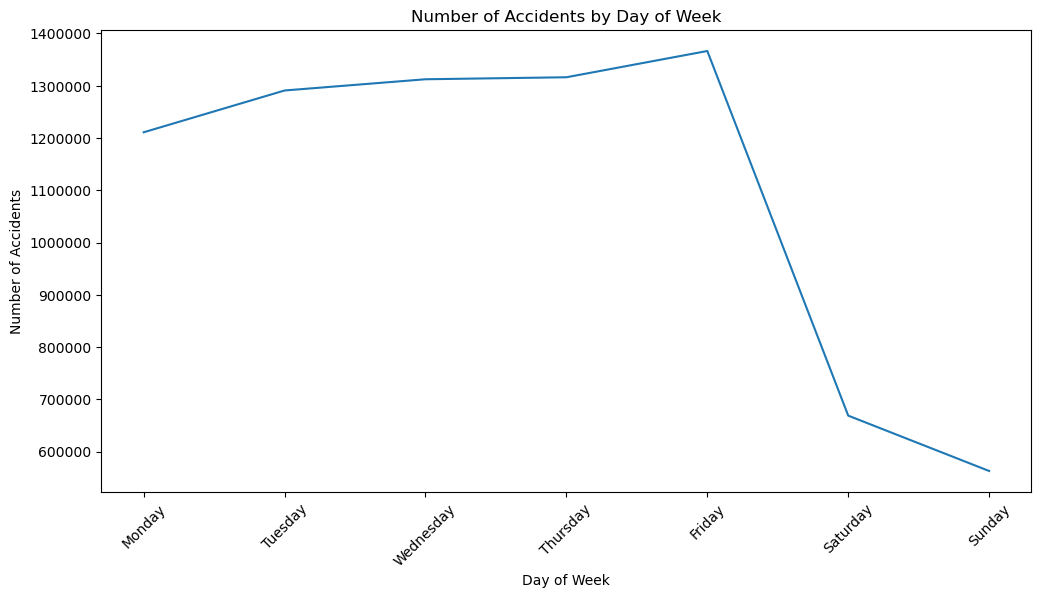

In [48]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df2 = pd.DataFrame(list(accidents_per_day.items()), columns = ["Day", "Count"])
df2['Day'] = pd.Categorical(df2['Day'], categories = days_of_week, ordered = True )
df2 = df2.sort_values('Day')
plt.figure(figsize = (12,6))
plt.plot(df2['Day'], df2['Count'])
plt.xlabel("Day of Week")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Day of Week")
plt.xticks(rotation = 45)
plt.ticklabel_format(style='plain', axis='y') 


plt.savefig("accidents_by_week", dpi = 300)


Look at number of accidents by accident severity and duration

/var/folders/lx/88c6mhcn6mg8tk_mq81zmc780000gn/T/ipykernel_78133/3052774910.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_duration = time_df.groupby(['Severity', 'duration_category']).size().unstack()


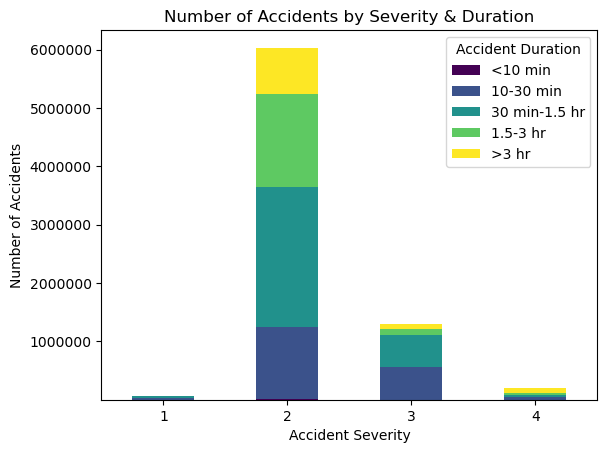

In [70]:

#categorize duration
bins = [0,10,30,90,180,600]
labels = ["<10 min", "10-30 min", "30 min-1.5 hr", "1.5-3 hr", ">3 hr"]
time_df['duration_category'] = pd.cut(time_df['duration_min'], bins = bins, labels = labels)
severity_duration = time_df.groupby(['Severity', 'duration_category']).size().unstack()
severity_duration

severity_duration.plot(kind = "bar", stacked = True, colormap = 'viridis' )
plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Severity & Duration")
plt.legend(title="Accident Duration", bbox_to_anchor=(1, 1))
plt.xticks(rotation = 0)
plt.ticklabel_format(style='plain', axis='y') 
plt.savefig('severity_duration.png', dpi = 300)